# Building a linear regression model using ridge regression

Here we'll repeat the same process that was did in the lasso-regression.ipynb, but using the ridge regression method for regularization. For more details about the code, you should check the lasso-regression notebook.

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import utils

# para conseguir repetir o experimento 
seed = 50
np.random.seed(seed)

In [12]:
df = pd.read_csv('AB2_formation_energy_materials_spacegroup.csv')
df.drop('Unnamed: 0', axis='columns', inplace=True)
df.head(5)

,Material,Space Group,hform,Z_x,Electronegativity_x,IonizationPotential_x,ElectronAffinity_x,HOMO_x,LUMO_x,r_s_orbital_x,...,r_p_orbital_y,r_d_orbital_y,r_atomic_nonbonded_y,r_valence_lastorbital_y,r_covalent_y,Valence_y,PeriodicColumn_y,PeriodicColumn_upto18_y,NumberUnfilledOrbitals_y,Polarizability_y
0,AgBr2,P-4m2,-0.132046,47,1.93,-7.8182,-1.2721,-4.4022,0.9657,1.3241,...,0.8834,0.2281,1.14,0.8834,1.2,17.0,7.0,17.0,1.0,21.8
1,AlBr2,P-3m1,-0.586257,13,1.61,-5.7176,0.0364,-2.7120,3.1169,1.1043,...,0.8834,0.2281,1.14,0.8834,1.2,17.0,7.0,17.0,1.0,21.8
2,AsBr2,P-6m2,0.082309,33,2.18,-9.0974,-1.6025,-5.1964,4.1976,0.8558,...,0.8834,0.2281,1.14,0.8834,1.2,17.0,7.0,17.0,1.0,21.8
3,AsBr2,P-3m1,0.192804,33,2.18,-9.0974,-1.6025,-5.1964,4.1976,0.8558,...,0.8834,0.2281,1.14,0.8834,1.2,17.0,7.0,17.0,1.0,21.8
4,AuBr2,P-4m2,0.025653,79,2.54,-9.3842,-2.3142,-5.7531,0.7024,1.2274,...,0.8834,0.2281,1.14,0.8834,1.2,17.0,7.0,17.0,1.0,21.8


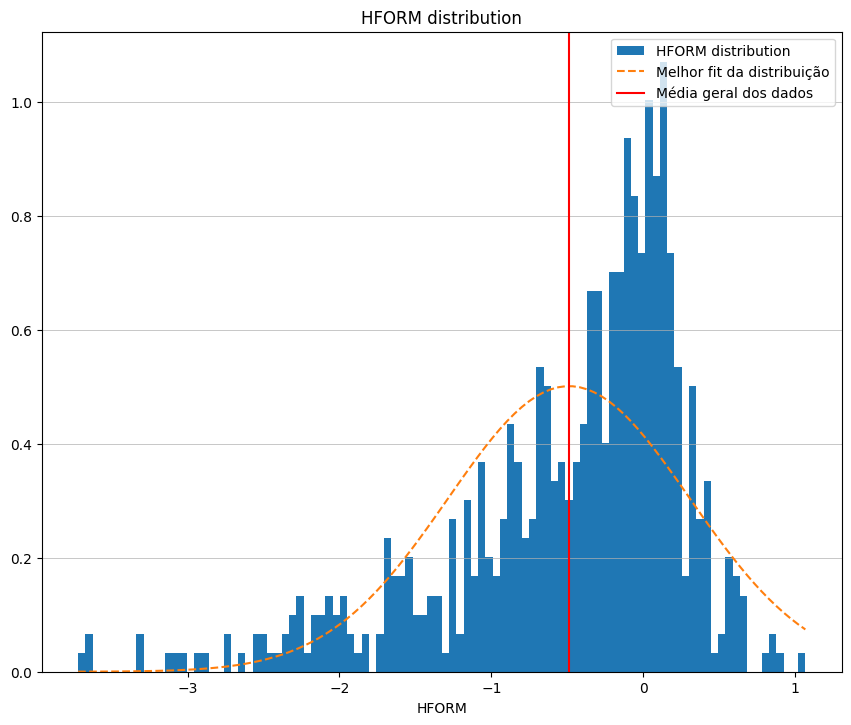

In [13]:
utils.histogram('fixed_bins_size', df['hform'], 'HFORM', 'upper right', 100, 'HFORM distribution')

In [14]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(df, test_size = 0.2, random_state = 2)
data_train = data_train.dropna()
data_test = data_test.dropna()

In [15]:
X = data_train.drop(['hform', 'Space Group', 'Material'], axis='columns') #(Features)
Y = data_train['hform'] #(Target)
print(X.shape,Y.shape)
X.head()

(485, 34) (485,)


,Z_x,Electronegativity_x,IonizationPotential_x,ElectronAffinity_x,HOMO_x,LUMO_x,r_s_orbital_x,r_p_orbital_x,r_d_orbital_x,r_atomic_nonbonded_x,...,r_p_orbital_y,r_d_orbital_y,r_atomic_nonbonded_y,r_valence_lastorbital_y,r_covalent_y,Valence_y,PeriodicColumn_y,PeriodicColumn_upto18_y,NumberUnfilledOrbitals_y,Polarizability_y
525,22,1.54,-7.3405,0.2887,-4.2515,-0.1659,1.5455,1.5379,0.5192,1.36,...,1.1492,0.4293,1.35,1.1492,1.38,16.0,6.0,16.0,2.0,37.00
142,22,1.54,-7.3405,0.2887,-4.2515,-0.1659,1.5455,1.5379,0.5192,1.36,...,0.7567,1.3489,0.99,0.7567,1.02,7.0,7.0,17.0,1.0,14.57
60,73,1.50,-7.6933,0.2096,-3.5963,-0.4436,1.4665,1.6644,0.8370,1.38,...,0.8834,0.2281,1.14,0.8834,1.20,17.0,7.0,17.0,1.0,21.80
441,22,1.54,-7.3405,0.2887,-4.2515,-0.1659,1.5455,1.5379,0.5192,1.36,...,0.8493,1.3934,1.02,0.8493,1.05,6.0,6.0,16.0,2.0,19.37
520,50,1.96,-6.8310,-0.8358,-3.6934,2.8969,1.0660,1.3554,0.4694,1.41,...,1.1492,0.4293,1.35,1.1492,1.38,16.0,6.0,16.0,2.0,37.00


In [16]:
X_test = data_test.drop(['hform', 'Space Group', 'Material'], axis='columns') #(Features)
Y_test = data_test['hform'] #(Target)
print(X_test.shape,Y_test.shape)
X_test.head()

(121, 34) (121,)


,Z_x,Electronegativity_x,IonizationPotential_x,ElectronAffinity_x,HOMO_x,LUMO_x,r_s_orbital_x,r_p_orbital_x,r_d_orbital_x,r_atomic_nonbonded_x,...,r_p_orbital_y,r_d_orbital_y,r_atomic_nonbonded_y,r_valence_lastorbital_y,r_covalent_y,Valence_y,PeriodicColumn_y,PeriodicColumn_upto18_y,NumberUnfilledOrbitals_y,Polarizability_y
585,74,2.36,-8.8329,-0.4374,-4.4864,-0.3665,1.4074,1.6061,0.7906,1.46,...,0.4333,1.0750,0.73,0.4333,0.66,6.0,6.0,16.0,2.0,5.24
438,73,1.50,-7.6933,0.2096,-3.5963,-0.4436,1.4665,1.6644,0.8370,1.38,...,0.8493,1.3934,1.02,0.8493,1.05,6.0,6.0,16.0,2.0,19.37
465,48,1.69,-9.2605,1.6111,-5.6570,-0.9432,1.2355,1.8040,0.5192,1.48,...,1.1492,0.4293,1.35,1.1492,1.38,16.0,6.0,16.0,2.0,37.00
560,28,1.91,-7.5452,-1.2886,-4.3916,0.5082,1.2589,1.5700,0.3377,1.21,...,0.4333,1.0750,0.73,0.4333,0.66,6.0,6.0,16.0,2.0,5.24
447,30,1.65,-9.8943,1.9968,-5.9772,-0.7858,1.1068,1.6435,0.2997,1.31,...,0.8493,1.3934,1.02,0.8493,1.05,6.0,6.0,16.0,2.0,19.37


## Ridge regression

Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values being far away from the actual values. 

In [17]:
from sklearn import metrics
from sklearn import linear_model

model_ridge = linear_model.Ridge(alpha=1,max_iter=100000) # least square minimum
model_ridge.fit(X,Y)

y_pred_train = model_ridge.predict(X)
train_error  = metrics.mean_squared_error(Y, y_pred_train, squared=True)


y_pred_test=model_ridge.predict(X_test)
test_error=metrics.mean_squared_error(Y_test, y_pred_test, squared=True)

print('Train error (MSE): ', train_error)
print('Test error (MSE):  ', test_error)


Train error (MSE):  0.17578579028369265
Test error (MSE):   0.19308385461770938


In [18]:
print('Ridge coef: ', model_ridge.coef_)
print('Max of the Ridge coef: ', np.max(np.abs(model_ridge.coef_)))
print('Min of the Ridge coef: ', np.min(np.abs(model_ridge.coef_)))
print('Index of the max of the Ridge coef: ', np.argmax(model_ridge.coef_))
print('Index of the min of the Ridge coef: ', np.argmin(np.abs(model_ridge.coef_)))

Ridge coef:  [-6.91572345e-03  3.55665797e-01 -1.58118964e-01 -1.25736930e-01
  7.48653680e-02  2.10016826e-02  9.88975846e-01 -1.90522429e-02
  3.56974022e-01 -7.91720503e-02 -4.05115980e-01 -9.92372347e-01
  3.93911699e-02 -4.12801954e-03  8.39353010e-02 -1.23548380e-02
  5.72569508e-03  4.74035327e-04  4.68571838e-01  1.53350475e-01
  1.48847987e-01  1.62777834e-01  2.05274451e-02  5.72750233e-02
  9.12867480e-02  1.55795240e-02  3.97336549e-02  5.62974913e-02
 -7.17777232e-03 -1.34568880e-02  1.99427249e-01  6.74258715e-03
  6.25433863e-02  3.31473799e-03]
Max of the Ridge coef:  0.992372346954181
Min of the Ridge coef:  0.0004740353266580597
Index of the max of the Ridge coef:  6
Index of the min of the Ridge coef:  17
